# TESS Tutorial using Lightkurve 
I have borrowed a tutorial presented by Christina Hedges at the Tess Data workshop to put this together.  Lightkurve is apackage written by people in the Kepler/K2 mission office to work with time series data from Kepler, K2 and TESS.  It simplifies a lot of the steps if you like to program in a pythonic sort of way.

Target Pixel Files (TPFs) are a file common to Kepler/K2 and the TESS mission. They contain movies of the pixel data centered on a single target star.

TPFs can be thought of as stacks of images, with one image for every timestamp the telescope took data. Each timestamp is referred to as a **cadence**. These images are cut out 'postage stamps' of the full observation to make them easier to work with. 

TPFs are given in FITS files, which you can read more about [here](https://fits.gsfc.nasa.gov/fits_primer.html). *Lightkurve* includes tools for you to work directly with these files easily and intuitively.

In this tutorial we'll cover the basics of working with TPFs. In *lightkurve* there are classes to work with each mission. For example `KeplerTargetPixelFile` deals with data from the Kepler (and K2) mission. `TessTargetPixelFile` deals with data from the TESS mission. We'll use a Kepler TPF as an example.

To load a `KeplerTargetPixelFile` from a local path or remote url, simply create a new object using the location of the file as the parameter:

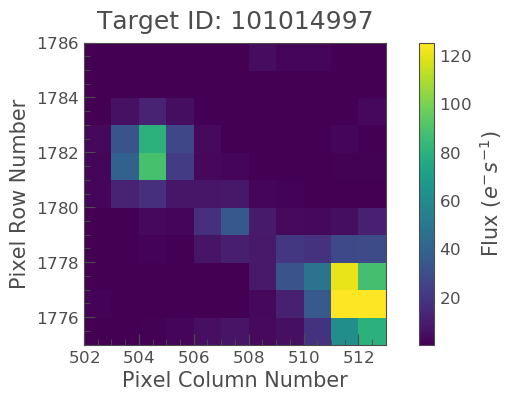

In [14]:
import lightkurve as lk
tpf = lk.search_targetpixelfile('BPM 31594', sector=3).download()
tpf.plot()

* Light Curve Files (LCFs): These files are created by the TESS pipeline. The pipeline processes the pixels into light curves, and stores them as a fits file. For TESS, Kepler and K2 there are two light curves in each light curve file; a Simple Aperture Photometry (SAP) light curve and a Pre Datasearch Conditioned (PDCSAP) light curve. The PDCSAP light curves have been processed to remove some instrumental artefacts.

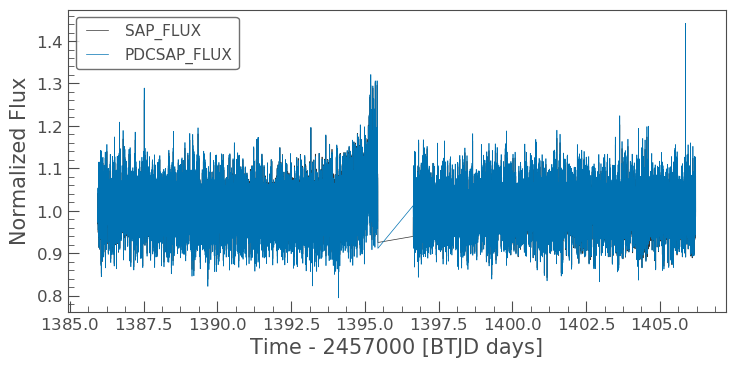

In [15]:
lcf = lk.search_lightcurvefile('BPM 31594',sector=3).download()
lcf.plot();

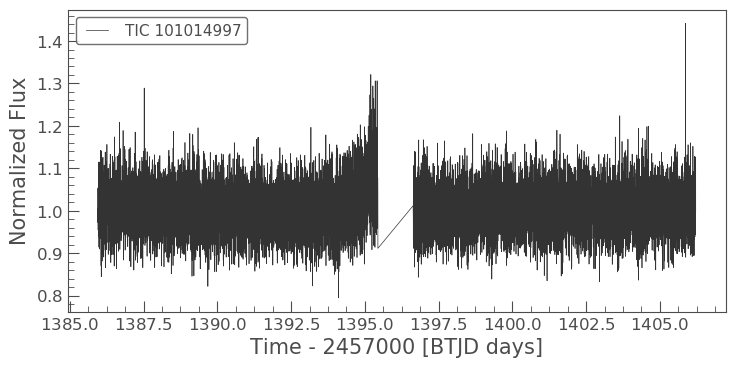

In [16]:
lc = lcf.PDCSAP_FLUX
lc.plot();

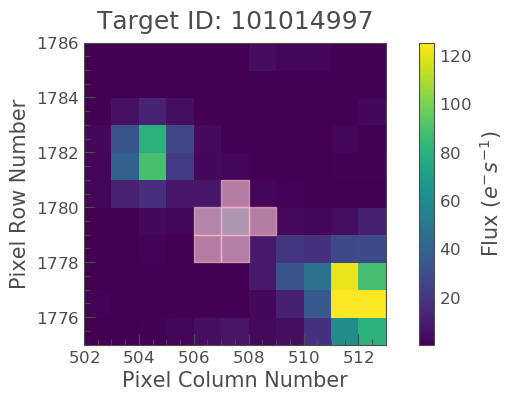

In [17]:
#Curious about the pipeline mask.
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [18]:
#Take a Periodogram
import numpy as np
# Create periodogram object
p = lc.remove_nans().to_periodogram(method='LombScargle')

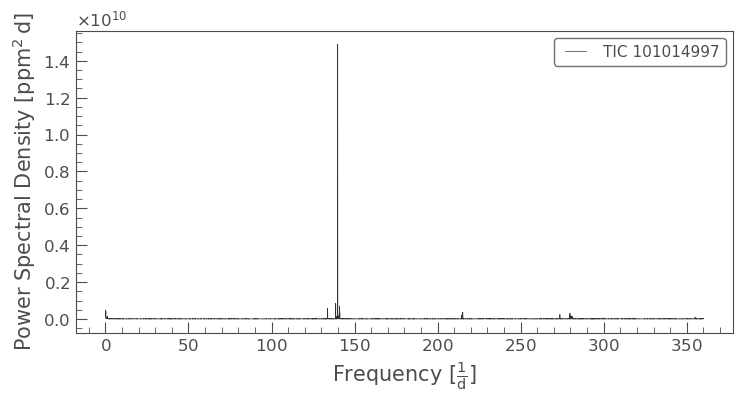

In [19]:
p.plot()

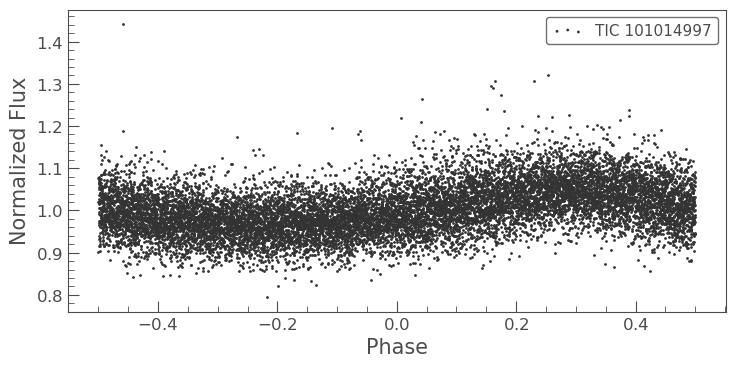

In [20]:
lc.fold(p.period_at_max_power.value).scatter();

In [21]:
#Tess cut with lightkurve
tpf = lk.search_tesscut('Pi Men').download(cutout_size=20)
tpf.plot()

AttributeError: module 'lightkurve' has no attribute 'search_tesscut'